# Secondary Features' extraction from Primary Features

In this code we aim to extract features for later regression of performance in assigment based on the data1 file that has all the features from student's actions between submissions.

In [2]:
import pandas as pd
import csv
%matplotlib inline

### 1. Loading

In [3]:
df_tr = pd.read_csv(filepath_or_buffer='OutputTable.csv', sep=',')
df_te = pd.read_csv(filepath_or_buffer='OutputTable_test.csv', sep=',')

In [4]:
df_te.head()

,ProblemID,SubmissionNumber,TimeSinceLast,GradeDiff,NVideoEvents,NForumEvents,AverageVideoTimeDiffs,ForumActivity,DifferentVideos,NumberOfUpvotes,DurationOfVideoActivity,NumberOfThreadViews,uniqRowID_1,uniqRowID_2,Diff_Prob_Ini,Diff_Prob_Fin,Exp_Prob_GradeDiff,logTimeSinceLast
0,0,1,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5b8b14f8786cdb2e76c58313219eab2a_0_1,5b8b14f8786cdb2e76c58313219eab2a_0,83.973128,88.585112,8.64389,5.420535
1,0,2,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5b8b14f8786cdb2e76c58313219eab2a_0_2,5b8b14f8786cdb2e76c58313219eab2a_0,83.973128,88.585112,8.64389,4.962845
2,0,1,339.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f458d6460e49ea8fddd02502a554d9f4_0_1,f458d6460e49ea8fddd02502a554d9f4_0,83.973128,88.585112,8.64389,5.826000
3,0,1,258540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1f3cf1cc6de39a680480ad36534f5cab_0_1,1f3cf1cc6de39a680480ad36534f5cab_0,83.973128,88.585112,8.64389,12.462806
4,0,2,267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1f3cf1cc6de39a680480ad36534f5cab_0_2,1f3cf1cc6de39a680480ad36534f5cab_0,83.973128,88.585112,8.64389,5.587249


In [5]:
df_te.dropna(how='any',axis=0,inplace=True)

### 2. Split - Aggregation

To facilitate the grouping per student per problem (our composite index) we will split the dataframe in three. Those features that we will simply add up, and those which we need to keep only one instance of (last and first), like the case of the submission number, for which we well now preserve only the last, changing it's meaning to "number of submissions". We also carry around the index for merging later.

In [6]:
#Non-summables-last
df_tr_keeplast = df_tr.loc[:,['uniqRowID_2','ProblemID','SubmissionNumber','Diff_Prob_Ini','Diff_Prob_Fin','Exp_Prob_GradeDiff']]
df_te_keeplast = df_te.loc[:,['uniqRowID_2','ProblemID','SubmissionNumber','Diff_Prob_Ini','Diff_Prob_Fin','Exp_Prob_GradeDiff']]

#Summables
df_tr_summable = df_tr.loc[:,['uniqRowID_2','logTimeSinceLast', 'NVideoEvents',
       'NForumEvents', 'NumberOfUpvotes','ForumActivity', 'NumberOfThreadViews',
       'DurationOfVideoActivity','GradeDiff']]
df_te_summable = df_te.loc[:,['uniqRowID_2','logTimeSinceLast', 'NVideoEvents',
       'NForumEvents', 'NumberOfUpvotes','ForumActivity', 'NumberOfThreadViews',
       'DurationOfVideoActivity']]

In [7]:
#Simplification
df_g_tr_keeplast = df_tr_keeplast.drop_duplicates(subset='uniqRowID_2', keep='last').set_index('uniqRowID_2')
df_g_te_keeplast = df_te_keeplast.drop_duplicates(subset='uniqRowID_2', keep='last').set_index('uniqRowID_2')

df_g_tr_summable = df_tr_summable.groupby('uniqRowID_2').sum()
df_g_te_summable = df_te_summable.groupby('uniqRowID_2').sum()

In [8]:
#Aggregation
df_g_tr = pd.concat([df_g_tr_keeplast, df_g_tr_summable], axis=1)
df_g_te = pd.concat([df_g_te_keeplast, df_g_te_summable], axis=1)

In [9]:
#Rename for clarity
df_tr_final = df_g_tr.rename(columns={'SubmissionNumber':'NSubmissions','GradeDiff':'Performance','logTimeSinceLast': 'logTimeSinceFirst'})
df_te_final = df_g_te.rename(columns={'SubmissionNumber':'NSubmissions','logTimeSinceLast': 'logTimeSinceFirst'})

#Expand by combining
df_tr_final['Exp_Prob_Perf'] = df_tr_final['Exp_Prob_GradeDiff'] * df_tr_final['NSubmissions']
df_te_final['Exp_Prob_Perf'] = df_te_final['Exp_Prob_GradeDiff'] * df_te_final['NSubmissions']

df_te_final.head(10)

,ProblemID,NSubmissions,Diff_Prob_Ini,Diff_Prob_Fin,Exp_Prob_GradeDiff,logTimeSinceFirst,NVideoEvents,NForumEvents,NumberOfUpvotes,ForumActivity,NumberOfThreadViews,DurationOfVideoActivity,Exp_Prob_Perf
000143a7618ac9cae91b0bf7d059c1fd_4,4,2,40.927461,87.606218,12.247145,10.418853,0.0,0.0,0.0,0.0,0.0,0.0,24.494290
000143a7618ac9cae91b0bf7d059c1fd_5,5,13,49.257932,85.833001,9.146499,70.016082,0.0,0.0,0.0,0.0,0.0,0.0,118.904492
000143a7618ac9cae91b0bf7d059c1fd_6,6,2,73.817374,79.443807,7.666016,13.563180,0.0,0.0,0.0,0.0,0.0,0.0,15.332031
000143a7618ac9cae91b0bf7d059c1fd_7,7,2,48.199768,94.878049,15.135576,12.056760,0.0,0.0,0.0,0.0,0.0,0.0,30.271152
0019bbc70f71e4620273237a1e99bfde_1,1,2,54.034810,80.551160,12.695707,22.519414,196.0,0.0,0.0,0.0,0.0,977978.0,25.391414
0019bbc70f71e4620273237a1e99bfde_11,11,6,49.730917,93.739703,7.738509,35.190261,0.0,0.0,0.0,0.0,0.0,0.0,46.431054
0019bbc70f71e4620273237a1e99bfde_2,2,2,51.463068,78.191288,12.488938,22.521657,196.0,0.0,0.0,0.0,0.0,977978.0,24.977876
0019bbc70f71e4620273237a1e99bfde_4,4,5,40.927461,87.606218,12.247145,30.218988,0.0,0.0,0.0,0.0,0.0,0.0,61.235726
0019bbc70f71e4620273237a1e99bfde_5,5,2,49.257932,85.833001,9.146499,13.273194,0.0,0.0,0.0,0.0,0.0,0.0,18.292999
0019bbc70f71e4620273237a1e99bfde_9,9,1,63.011811,95.271654,8.891059,5.493061,0.0,0.0,0.0,0.0,0.0,0.0,8.891059


### 4. Visualization

Visualization of some of our features can be quite telling:

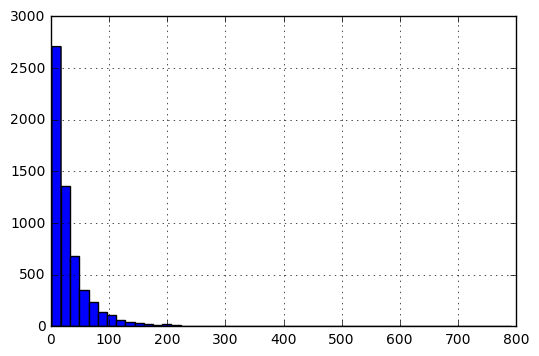

In [15]:
df_tr_final.logTimeSinceFirst.hist(bins=50)

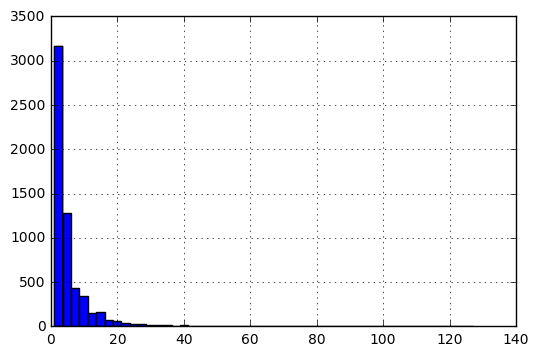

In [10]:
df_tr_final.NSubmissions.hist(bins=50)

In [11]:
df_tr_final.NSubmissions.value_counts().head(22)

1     1442
2      999
3      721
4      539
5      446
6      296
7      232
8      199
9      127
10     117
11      95
12      87
14      71
13      67
15      55
16      38
17      35
18      34
19      25
22      22
20      19
23      18
Name: NSubmissions, dtype: int64

More steady decrease than expected, but still, more people with 22 submissions than people with 21. Feels like a power-law

Checking some other features from our customize set:

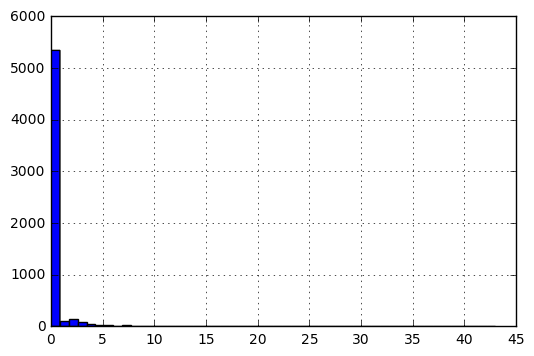

In [12]:
df_tr_final.ForumActivity.hist(bins=50)

In [13]:
df_tr_final.ForumActivity.value_counts().head(10)

0.0    5343
2.0     137
1.0     105
3.0      85
4.0      48
5.0      30
6.0      22
7.0      21
8.0      14
9.0       9
Name: ForumActivity, dtype: int64

In [14]:
df_tr_final.ForumActivity.describe()

count    5850.000000
mean        0.341538
std         1.640945
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        43.000000
Name: ForumActivity, dtype: float64

We wee that despite the agreggation step through all submissions, this feature keeps being very sparse, and thus probably not very useful for the regressor.

### 5. Save to CSV

In [30]:
df_tr_final.reset_index().to_csv(path_or_buf='secondryFeatures.csv', sep=',', index=False)
df_te_final.reset_index().to_csv(path_or_buf='secondryFeatures_test.csv', sep=',', index=False)